In [784]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [785]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [786]:
path0 = '/content/drive/MyDrive/에폭/SeoulBikeData.csv'

df = pd.read_csv(path0, encoding='cp949')
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [787]:
df.shape

(8760, 14)

관측치 수 8760 = 365*24

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [789]:
H=df[df['Holiday'] == "Holiday"]
H_date = H.groupby('Date').size().reset_index(name='count')
print(H_date)

          Date  count
0   01/01/2018     24
1   01/03/2018     24
2   01/05/2018     24
3   03/10/2018     24
4   06/06/2018     24
5   09/10/2018     24
6   15/02/2018     24
7   15/08/2018     24
8   16/02/2018     24
9   17/02/2018     24
10  22/05/2018     24
11  22/12/2017     24
12  23/09/2018     24
13  24/09/2018     24
14  24/12/2017     24
15  25/09/2018     24
16  25/12/2017     24
17  31/12/2017     24


주말 미포함 공휴일만!

**운영여부 변수**

In [790]:
NFD=df[df['Functioning Day'] == "No"]
count_per_date = NFD.groupby('Date').size().reset_index(name='count')
print(count_per_date)

          Date  count
0   02/10/2018     24
1   03/11/2018     24
2   04/10/2018     24
3   06/10/2018      7
4   06/11/2018     24
5   09/10/2018     24
6   09/11/2018     24
7   10/05/2018     24
8   11/04/2018     24
9   18/09/2018     24
10  19/09/2018     24
11  28/09/2018     24
12  30/09/2018     24


시스템 점검, 오류 등으로 추측 가능

-> 자전거 대여 수가 결측치가 아닌 0으로 출력

In [791]:
# 결측치 개수 확인
df.isnull().sum() #결측치 없음!

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(캜),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(캜),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


/tmp/ipython-input-3858849470.py:16: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  plt.tight_layout() #자동 간격 조정
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


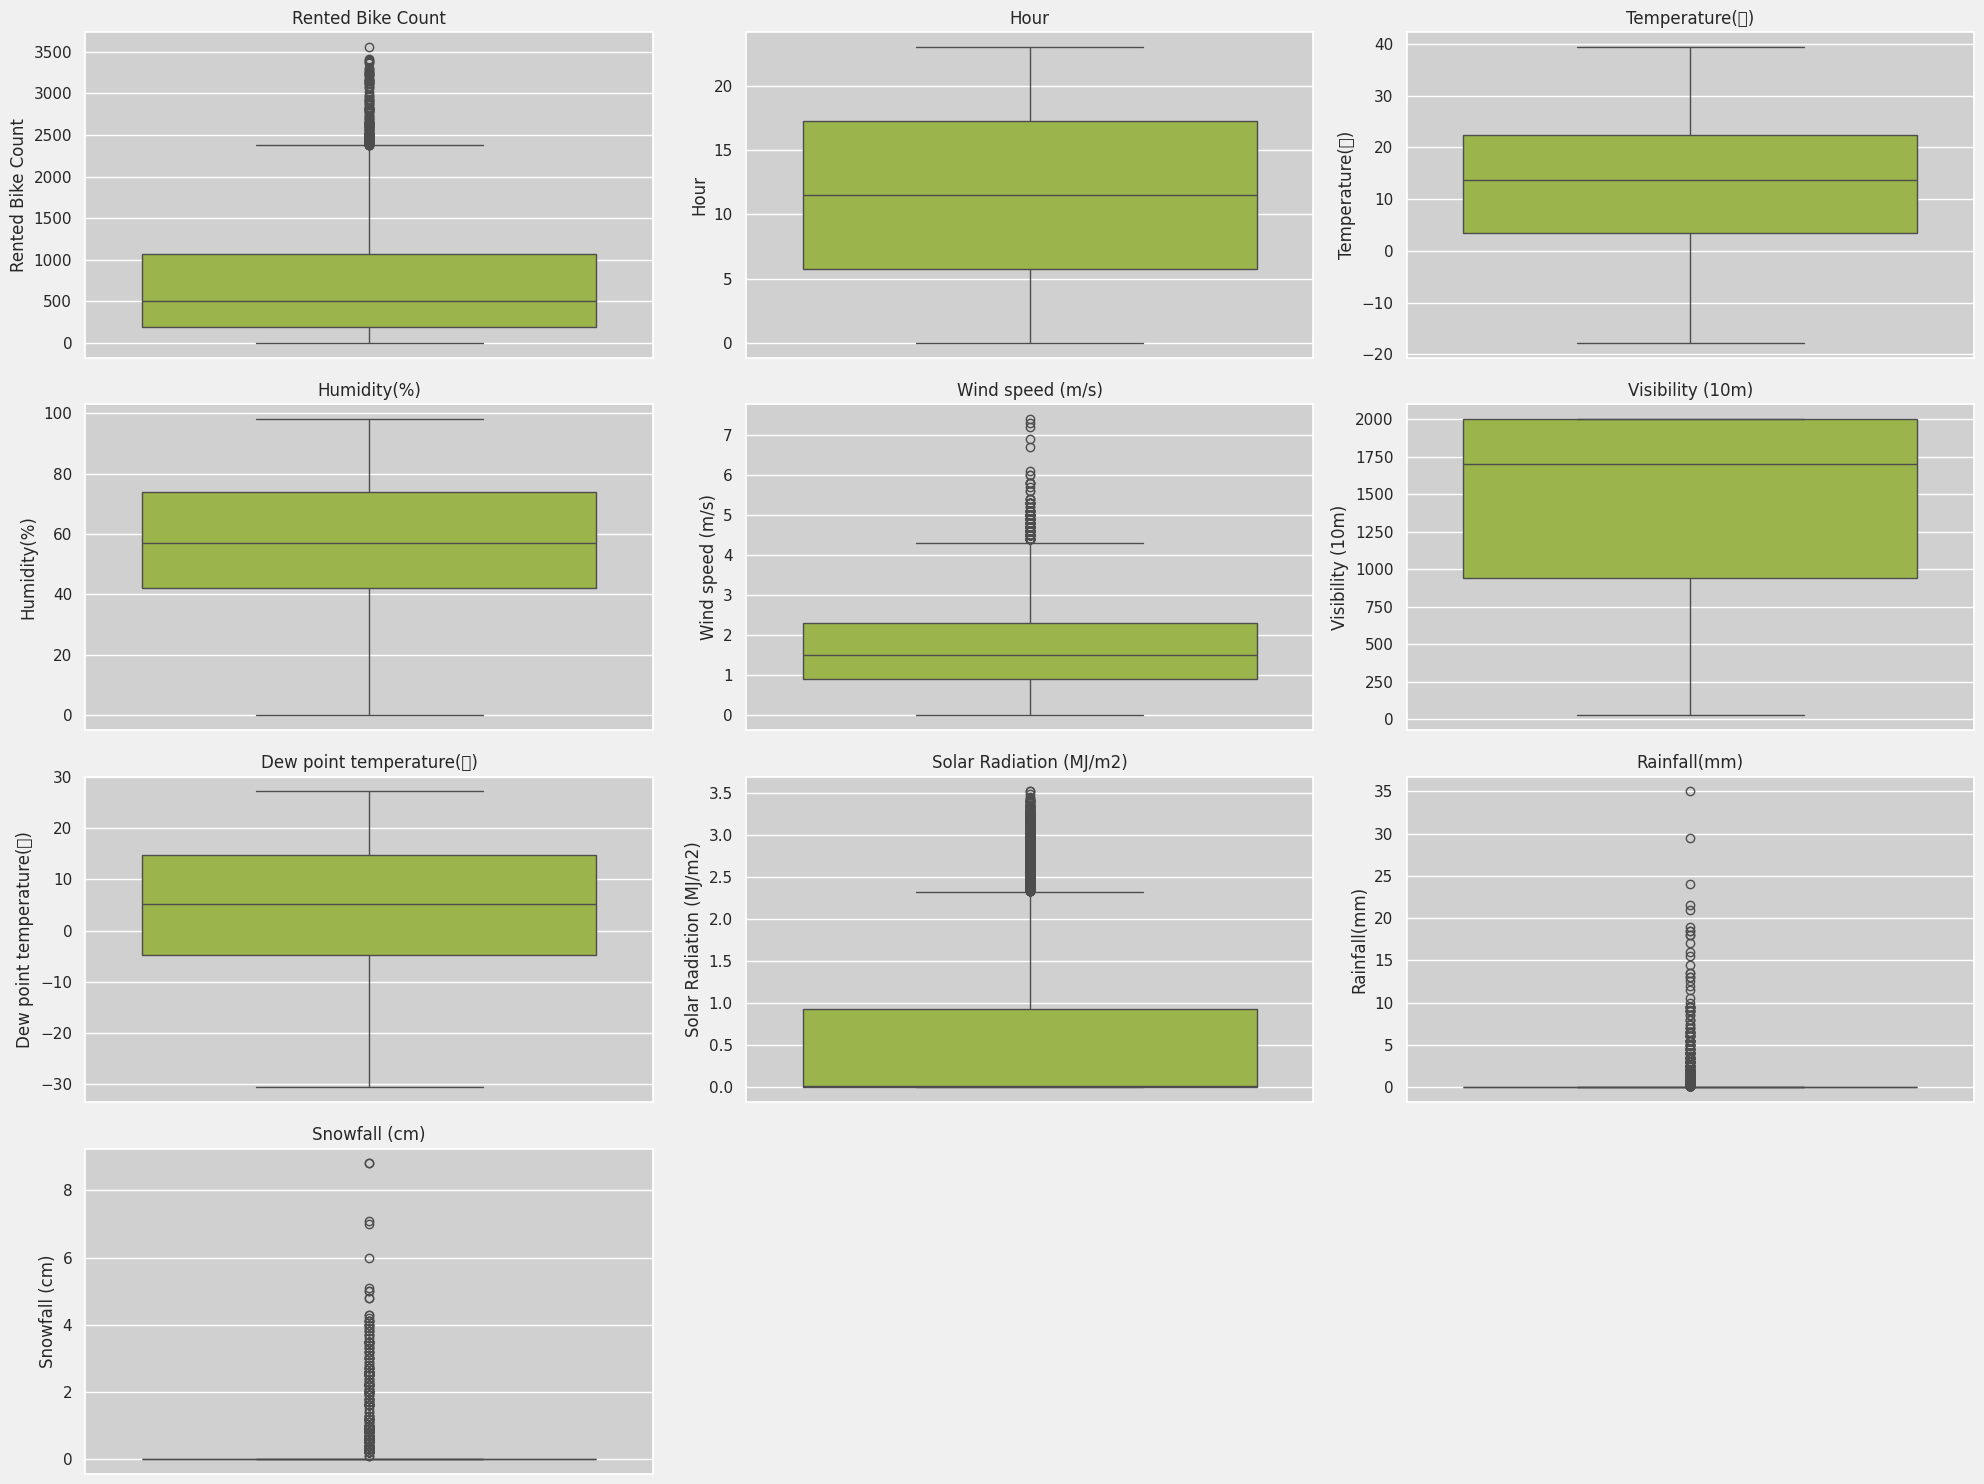

In [792]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]

cols = numerical_cols.columns

n_cols = 3 #한 행에 3개

n_rows = len(cols) // n_cols + (1 if len(cols) % n_cols != 0 else 0) #행 수 계산

plt.figure(figsize=(20,15))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=numerical_cols[col],color="#A4C639")
    plt.title(col)

plt.tight_layout() #자동 간격 조정
plt.show()

/tmp/ipython-input-1146284245.py:4: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


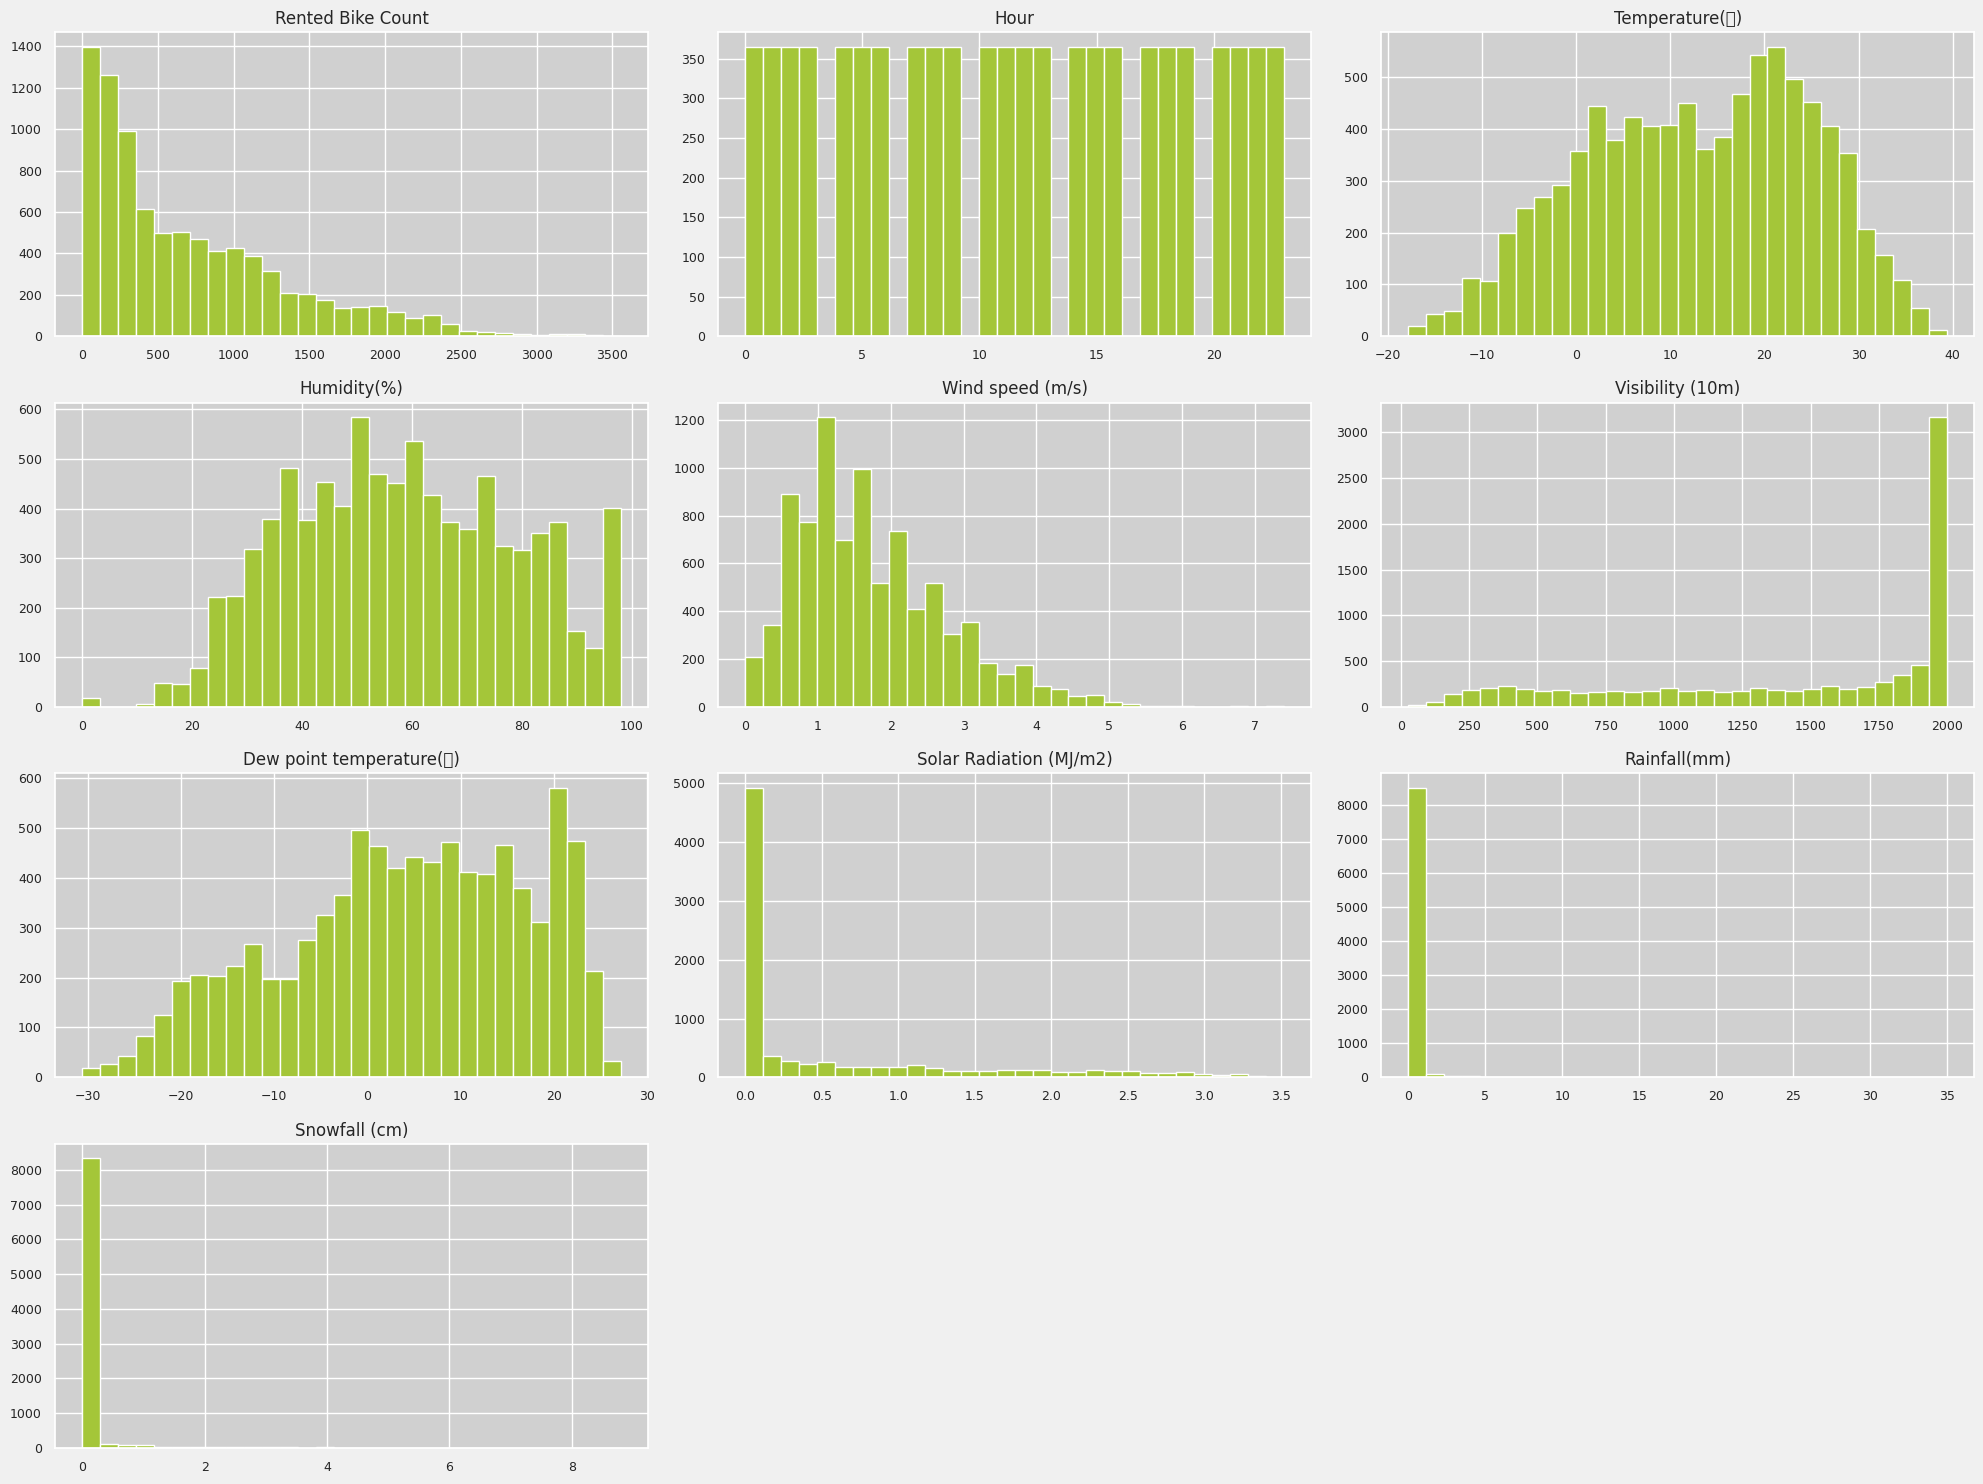

In [793]:
sns.set_style('whitegrid')
sns.set(rc={"axes.facecolor":"#D0D0D0","figure.facecolor":"#F0F0F0"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=9, ylabelsize=9,color="#A4C639")
plt.tight_layout()
plt.show()

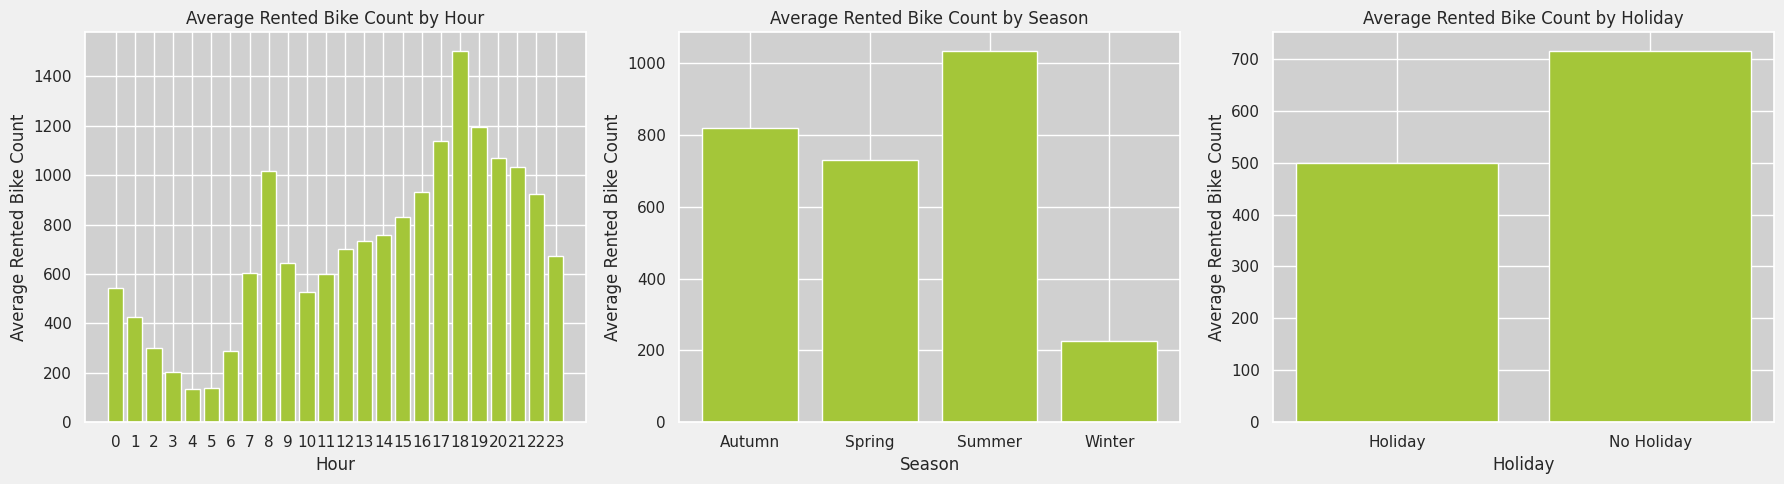

In [794]:
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
x=np.arange(24)
hour_df=df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
plt.bar(hour_df['Hour'],hour_df['Rented Bike Count'],color="#A4C639")
plt.xticks(x,hour_df['Hour'])
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Hour')

plt.subplot(1,3,2)
x=np.arange(4)
season_df=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
plt.bar(season_df['Seasons'],season_df['Rented Bike Count'],color="#A4C639")
plt.xticks(x,season_df['Seasons'])
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Season')

plt.subplot(1,3,3)
holiday_df=df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.bar(holiday_df['Holiday'],holiday_df['Rented Bike Count'],color="#A4C639")
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Holiday')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


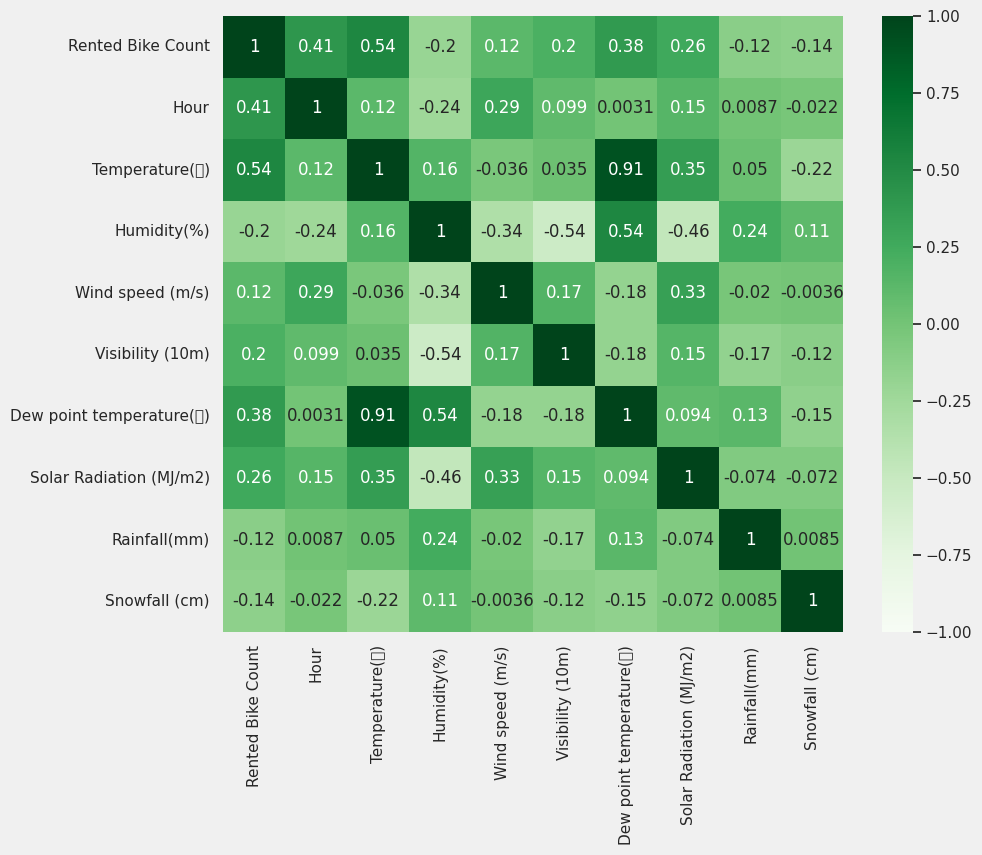

In [795]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="Greens",
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

In [796]:
#Date변수 바꿔주기(연도-월-일 형태)
#Date를 datetime 타입으로 변환 (현재 데이터 형식이 일/월/연도이므로 dayfirst=True)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


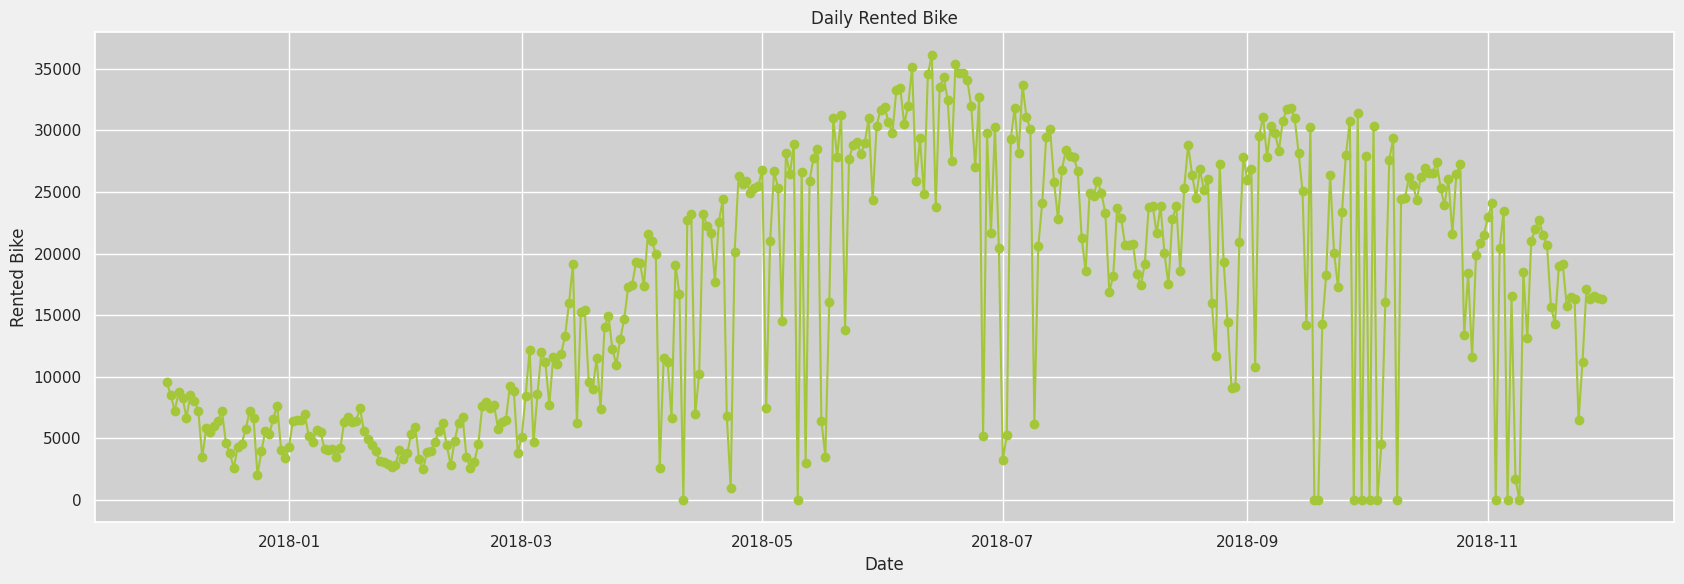

In [797]:
day_counts = df.groupby("Date")["Rented Bike Count"].sum().reset_index()

plt.figure(figsize=(17,6))
plt.plot(day_counts["Date"], day_counts["Rented Bike Count"], marker="o", linewidth=1.5,color='#A4C639')

plt.xlabel("Date")
plt.ylabel("Rented Bike")
plt.title("Daily Rented Bike")
plt.xticks()
plt.tight_layout()
plt.show()

변수명 수정 -> 각 변수명에 있는 괄호와 그 괄호 속 내용 제거 -> 깔끔

In [798]:
df.columns = df.columns.str.replace(r'\(.*?\)', '', regex=True).str.strip()
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


운영여부 변수 (Functioning Day)

운영하지 않는 시간대의 자전거 대여 수가 결측치가 아닌 0으로 출력. 결측치로 보고 제거.!

In [799]:
df = df[df["Functioning_Day"] != "No"] #제거
df.drop(columns=["Functioning_Day"], inplace=True)#Functional Day 변수 삭제
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [800]:
seasons_count = df['Seasons'].value_counts()
print(seasons_count)

Seasons
Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: count, dtype: int64


파생 변수 - 요일 변수 생성 후 주말 변수 생성한 후 요일 변수 삭제

In [801]:
df["Day_of_Week"] = df["Date"].dt.day_name()
df["Weekend"] = np.where(df["Day_of_Week"].isin(["Saturday", "Sunday"]), 1, 0)
df=df.drop(columns=["Day_of_Week"])
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0


범주형 변수 Holiday 이진변수로

In [802]:
# Holiday 변수를 0,1로 변환
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0


In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8465 non-null   datetime64[ns]
 1   Rented_Bike_Count      8465 non-null   int64         
 2   Hour                   8465 non-null   int64         
 3   Temperature            8465 non-null   float64       
 4   Humidity               8465 non-null   int64         
 5   Wind_speed             8465 non-null   float64       
 6   Visibility             8465 non-null   int64         
 7   Dew_point_temperature  8465 non-null   float64       
 8   Solar_Radiation        8465 non-null   float64       
 9   Rainfall               8465 non-null   float64       
 10  Snowfall               8465 non-null   float64       
 11  Seasons                8465 non-null   object        
 12  Holiday                8465 non-null   int64         
 13  Weekend 

In [804]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0


# **전처리 완료**

**계절별 회귀분석을 통한 자전거 대여 이용 패턴 분석**

In [805]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = ['Hour','Temperature','Humidity','Wind_speed','Visibility',
            'Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall',
            'Holiday','Weekend']

X = df[features]
y = df['Rented_Bike_Count']

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

regression_results = {}

for season in seasons:
    print(f"=== {season} 회귀분석 ===")
    df_season = df[df['Seasons'] == season].copy()
    X_season = df_season[features]
    y_season = df_season['Rented_Bike_Count']

    X_train, X_test, y_train, y_test = train_test_split(X_season, y_season, test_size=0.4, random_state=100)

    models = {
        'OLS': LinearRegression()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        regression_results[f"{season}_{name}"] = {'RMSE': rmse, 'R2': r2}
        print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
        #print(coef_df.sort_values(by='Coefficient', ascending=False))
        #print("\n")

=== Spring 회귀분석 ===
OLS -> RMSE: 395.49, R²: 0.590
=== Summer 회귀분석 ===
OLS -> RMSE: 475.13, R²: 0.527
=== Autumn 회귀분석 ===
OLS -> RMSE: 416.41, R²: 0.527
=== Winter 회귀분석 ===
OLS -> RMSE: 121.75, R²: 0.364


설명력이 0.364~0.59로 모두 낮게 나옴.

* 시간적 자기 상관 무시

=> 이러한 문제를 해결하기 위해 날짜별로 그룹화하여 나머지 변수들의 평균으로 묶음

In [806]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df1 = df.groupby('Date')[numeric_cols].mean().reset_index()

season_info = df[['Date', 'Seasons']].drop_duplicates(subset='Date')
df1 = df1.merge(season_info, on='Date', how='left')

df1.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekend,Seasons
0,2017-12-01,397.458333,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,0.0,0.0,Winter
1,2017-12-02,355.125000,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,0.0,1.0,Winter
2,2017-12-03,300.916667,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,0.0,1.0,Winter
3,2017-12-04,363.708333,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,0.0,0.0,Winter
4,2017-12-05,346.125000,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,0.0,0.0,Winter


In [807]:
features = ['Temperature','Humidity','Wind_speed','Visibility',
            'Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall',
            'Holiday','Weekend']

X = df1[features]
y = df1['Rented_Bike_Count']


seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

regression_results = {}

for season in seasons:
    print(f"=== {season} 회귀분석 ===")
    df_season = df1[df1['Seasons']==season].copy()
    X_season = df_season[features]
    y_season = df_season['Rented_Bike_Count']

    X_train, X_test, y_train, y_test = train_test_split(X_season, y_season, test_size=0.4, random_state=100)

    models = {
        'OLS': LinearRegression()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        regression_results[f"{season}_{name}"] = {'RMSE': rmse, 'R2': r2}
        print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")

=== Spring 회귀분석 ===
OLS -> RMSE: 139.80, R²: 0.818
=== Summer 회귀분석 ===
OLS -> RMSE: 160.85, R²: 0.732
=== Autumn 회귀분석 ===
OLS -> RMSE: 198.43, R²: 0.418
=== Winter 회귀분석 ===
OLS -> RMSE: 43.99, R²: 0.647


관측치 수는 확 줄어들지만 설명력은 매우 높아짐.

시간대별 변동성과 시계열적 자기상관을 어느 정도 제거했다고 볼 수 있음

**문제점: 관측치 수 감소**

계절별로 120개 관측치밖에 없음 → 회귀 분석 시 변수 수 대비 표본 수가 적어짐

=> 변수 줄이기

**상관계수가 높은 변수 하나 제거하기**

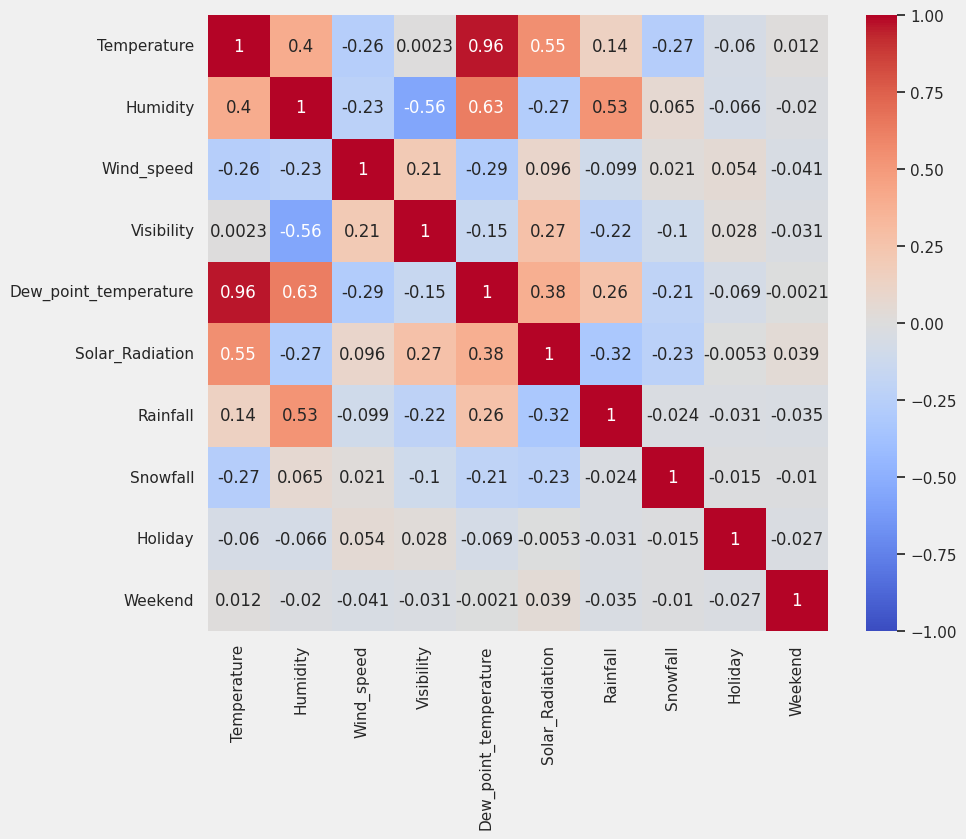

In [808]:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Dew_point_temperature변수 제거

In [809]:
X_reduced = X.drop(['Dew_point_temperature'], axis=1)

**라쏘로 변수 선택**

In [810]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

lasso_results = {}

for season in seasons:
    print(f"\n=== {season} LassoCV ===")

    # 계절별 데이터
    df_season = df1[df1['Seasons'] == season].copy()
    X_season = df_season[X_reduced.columns]
    y_season = df_season['Rented_Bike_Count']

    # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_season)
    y_array = y_season.values

    # LassoCV
    lasso_cv = LassoCV(cv=5, random_state=100)
    lasso_cv.fit(X_scaled, y_array)

    # 최적 alpha
    print("최적 alpha:", lasso_cv.alpha_)

    # 선택된 변수
    coef = pd.Series(lasso_cv.coef_, index=X_season.columns)
    selected = coef[coef != 0]
    removed = coef[coef == 0].index.tolist()

    #print("선택 변수:\n", selected)
    print("제거된 변수:", removed)

    # 결과 저장
    lasso_results[season] = {'alpha': lasso_cv.alpha_, 'selected': selected, 'removed': removed}


=== Spring LassoCV ===
최적 alpha: 0.26002466569288907
제거된 변수: ['Snowfall']

=== Summer LassoCV ===
최적 alpha: 0.195017284171549
제거된 변수: ['Snowfall']

=== Autumn LassoCV ===
최적 alpha: 12.769121139682008
제거된 변수: ['Humidity']

=== Winter LassoCV ===
최적 alpha: 4.664481060365045
제거된 변수: ['Humidity', 'Visibility', 'Solar_Radiation']


In [811]:
from sklearn.model_selection import KFold, cross_val_score


seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# 교차검증 결과 저장
cv_results = {}

for season in seasons:
    print(f"\n=== {season} 교차검증 ===")

    df_season = df1[df1['Seasons'] == season].copy()

    # Lasso에서 선택된 변수만
    selected_features = lasso_results[season]['selected'].index.tolist()
    X_season = df_season[selected_features]
    y_season = df_season['Rented_Bike_Count']

    # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_season)
    y_array = y_season.values

    # 3-fold KFold
    kf = KFold(n_splits=3, shuffle=True, random_state=100)

    # OLS 모델 사용
    model = LinearRegression()
    scores = cross_val_score(model, X_scaled, y_array, cv=kf, scoring='r2')

    rmse_scores = cross_val_score(model, X_scaled, y_array, cv=kf, scoring='neg_root_mean_squared_error')
    rmse_scores = -rmse_scores

    print("평균 R²:", np.mean(scores))
    print("R² 표준편차:", np.std(scores))
    print("평균 RMSE:", np.mean(rmse_scores))
    print("RMSE 표준편차:", np.std(rmse_scores))

    cv_results[season] = {
        'mean_r2': np.mean(scores),
        'std_r2': np.std(scores),
        'mean_rmse': np.mean(rmse_scores),
        'std_rmse': np.std(rmse_scores)
    }

    # 결과 저장
    cv_results[season] = {'mean_r2': np.mean(scores), 'std_r2': np.std(scores)}


=== Spring 교차검증 ===
평균 R²: 0.8437108730338257
R² 표준편차: 0.04688266802314607
평균 RMSE: 129.622515302241
RMSE 표준편차: 14.370344073885109

=== Summer 교차검증 ===
평균 R²: 0.678478209704247
R² 표준편차: 0.087889977353826
평균 RMSE: 164.93091514750324
RMSE 표준편차: 34.87199616327394

=== Autumn 교차검증 ===
평균 R²: 0.6958919626467163
R² 표준편차: 0.08809297393321396
평균 RMSE: 149.0742369579639
RMSE 표준편차: 21.189748201516593

=== Winter 교차검증 ===
평균 R²: 0.5886071620455289
R² 표준편차: 0.05557757024428176
평균 RMSE: 47.260848477052605
RMSE 표준편차: 2.679913137791391


봄 (Spring):
평균 R² ≈ 0.84, 표준편차 ≈ 0.03
설명력이 높음 → 계절적 패턴이 비교적 잘 반영됨

여름 (Summer):
평균 R² ≈ 0.68, 표준편차 ≈ 0.13
설명력이 다소 낮음 → 여름은 변동성이 크고, 기상 요인 외 휴가철 특성이나 이벤트 등 다른 요인이 영향을 줬을 가능성

가을 (Autumn):
평균 R² ≈ 0.70, 표준편차 ≈ 0.14
설명력이 중간 수준 → 가을은 기상과 대여 패턴의 관계가 비교적 일정하지만, 일부 불규칙적 변동으로 인해 CV 결과가 다소 흔들림

겨울 (Winter):
평균 R² ≈ 0.58, 표준편차 ≈ 0.04
설명력이 가장 낮음 → 데이터 수가 적고, 눈·강추위 등 특수 요인이 커서 단순 회귀로는 설명하기 어려운 패턴 존재

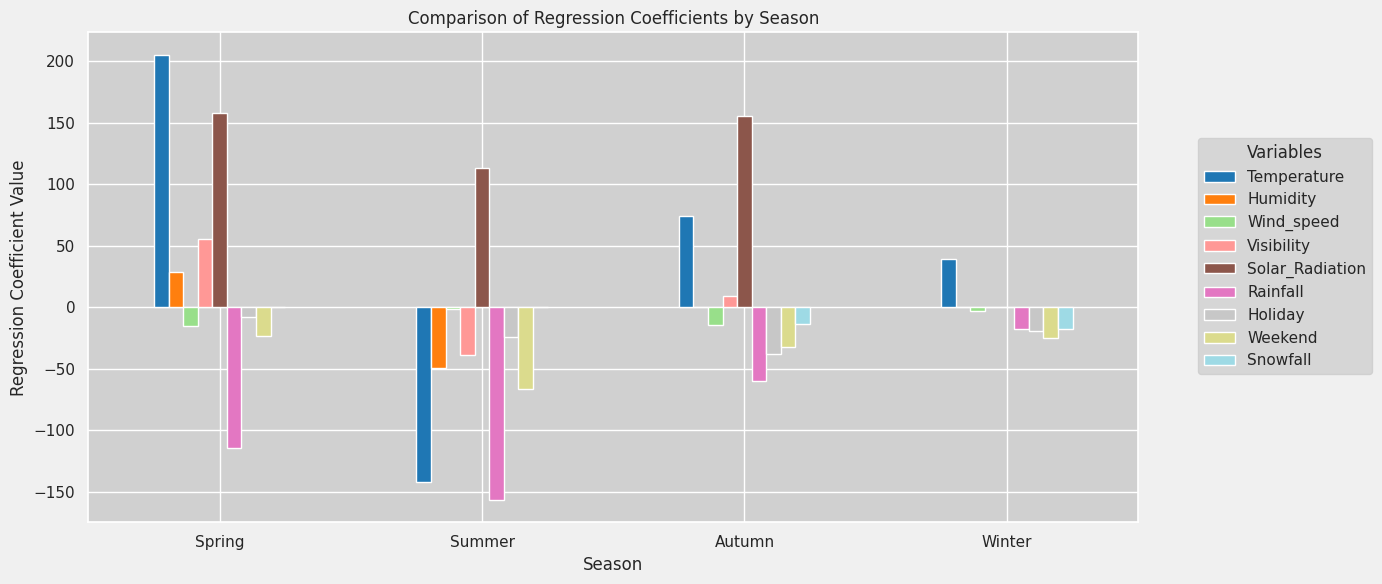

In [812]:
# 계절별 회귀 계수 비교
coeff_matrix = pd.DataFrame(index=seasons, columns=variables)
for season in seasons:
    coef_dict = lasso_results[season]['selected'].to_dict()
    for var in variables:
        coeff_matrix.loc[season, var] = coef_dict.get(var, 0)

coeff_matrix = coeff_matrix.astype(float)

# 색상 팔레트 변경 (Paired 팔레트)
colors = plt.cm.tab20(np.linspace(0, 1, len(variables)))

ax = coeff_matrix.plot(kind='bar', figsize=(14,6), color=colors)

plt.title("Comparison of Regression Coefficients by Season")
plt.xlabel("Season")
plt.ylabel("Regression Coefficient Value")
plt.xticks(rotation=0)


plt.legend(title='Variables', bbox_to_anchor=(1.05, 0.8), loc='upper left')

plt.tight_layout()
plt.show()


**트리기반모델**

최적 파라미터 찾기

In [813]:
#from sklearn.model_selection import RandomizedSearchCV

#param_dist = {
#    "n_estimators": [100, 200, 300, 500],
#    "max_depth": [3, 5, 7, 9],
#    "min_samples_leaf": [1, 3, 5, 10]
#}

#rand_search = RandomizedSearchCV(
#    RandomForestRegressor(random_state=100),
#    param_dist,
#    n_iter=10,
#    cv=5,
#    scoring="r2",
#    random_state=100,
#    n_jobs=-1
#)

#rand_search.fit(X, y)
#print("최적 파라미터:", rand_search.best_params_)
#print("최고 평균 R²:", rand_search.best_score_)


In [814]:
#param_dist = {
#    'n_estimators': [100, 200, 300, 500],
#    'max_depth': [3, 5, 7, 9],
#    'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'min_child_weight': [1, 3, 5],
#    'gamma': [0, 0.1, 0.2, 0.5]
#}

#rand_search = RandomizedSearchCV(
#    XGBRegressor(random_state=100, objective='reg:squarederror'),
#    param_distributions=param_dist,
#    n_iter=20,
#    cv=5,
#    scoring='r2',
#    random_state=100,
#    n_jobs=-1
#)

#rand_search.fit(X, y)

#print("최적 파라미터:", rand_search.best_params_)
#print("최고 평균 R²:", rand_search.best_score_)


In [815]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error


df1 = df.drop('Date', axis=1)
df = df1.copy()
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)

X = df.drop('Rented_Bike_Count', axis=1)
y = df['Rented_Bike_Count']

kf = KFold(n_splits=5, shuffle=True, random_state=100)


# 하이퍼파라미터 튜닝
models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=500, max_depth=9, min_samples_leaf=3, random_state=100
    ),
    "XGBoost": XGBRegressor(
        subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=9,
        learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, random_state=100
    )
}


scoring = {
    "R2": "r2",
    "RMSE": make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    "MAE": make_scorer(mean_absolute_error)
}

# 모델 평가
results = {}
for name, model in models.items():
    cv_result = cross_validate(model, X, y, cv=kf, scoring=scoring)

    mean_r2 = np.mean(cv_result['test_R2'])
    mean_rmse = np.mean(cv_result['test_RMSE'])
    mean_mae = np.mean(cv_result['test_MAE'])

    results[name] = {'R2': mean_r2, 'RMSE': mean_rmse, 'MAE': mean_mae}

    print(f"{name}: 평균 R² = {mean_r2:.4f}, RMSE = {mean_rmse:.2f}, MAE = {mean_mae:.2f}")



RandomForest: 평균 R² = 0.8978, RMSE = 205.21, MAE = 128.98
XGBoost: 평균 R² = 0.9353, RMSE = 163.23, MAE = 99.78


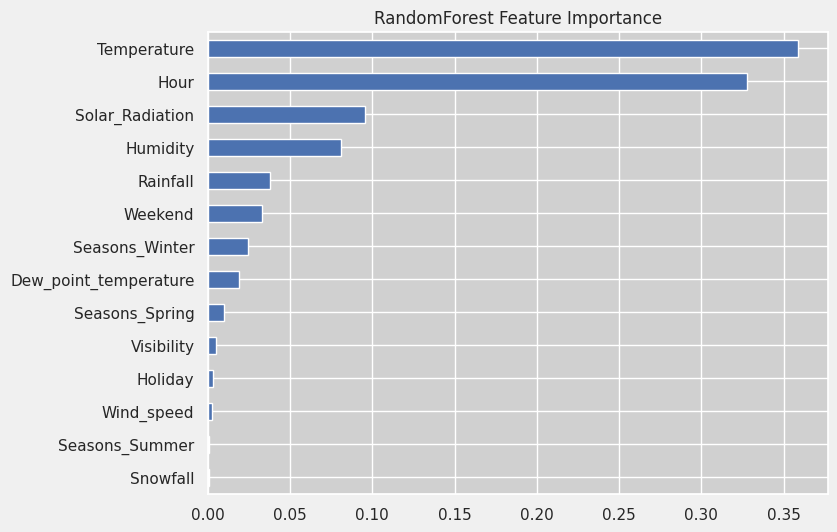

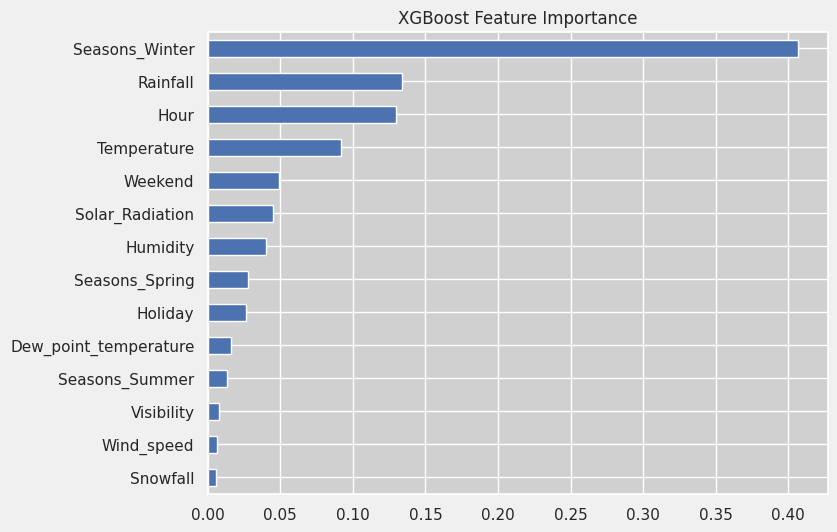

In [816]:
rf = models["RandomForest"]
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("RandomForest Feature Importance")
plt.show()

xgb = models["XGBoost"]
xgb.fit(X, y)

importances = pd.Series(xgb.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("XGBoost Feature Importance")
plt.show()

랜덤포레스트의 피처 중요도는 연속형 변수가 더 크게 잡히는 경향이 있음.

XGBoost의 피저 중요도는 하나가 압도적으로 크게 나옴. 그것이 계절 요인으로 이 데이터셋은 계절효과가 매우 강하게 반영된 것.